In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

airbnb_df = pd.read_csv('airbnb.csv')
crime_df = pd.read_csv('cw2018.csv')

reviews_df = airbnb_df.groupby('community').count()['reviews_per_month']
new_crime_df = crime_df.groupby('community').count()['CrimeType']
price_df = airbnb_df.groupby('community').median()['price']

C:\Users\junnk\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (44,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
all_data_df = pd.DataFrame()
all_data_df['reviews_per_month'] = reviews_df
all_data_df['CrimeType'] = new_crime_df
all_data_df['price'] = price_df
all_data_df.head(1000)
all_data_df.head(10)

,reviews_per_month,CrimeType,price
community,,,
ALBANY PARK,76,2237,65.0
ARCHER HEIGHTS,6,774,85.0
ARMOUR SQUARE,85,960,74.5
ASHBURN,5,2187,65.0
AUBURN GRESHAM,10,6754,60.0
AUSTIN,56,13849,72.0
AVALON PARK,3,1063,80.0
AVONDALE,166,2168,90.0
BELMONT CRAGIN,28,3945,60.0


In [39]:
y = all_data_df['price']
x = all_data_df[['CrimeType', 'reviews_per_month']]
y.shape, x.shape

((75,), (75, 2))

In [40]:
model = LinearRegression()
model.fit(x, y)

score = model.score(x, y)
coefficient = model.coef_
intercept = model.intercept_
print("R Squared: {}".format(score))
print("Crime Count Coefficient: {}".format(coefficient[0])) 
print("Reviews Count Coefficient: {}".format(coefficient[1]))
print("Intercept: {}".format(intercept))
print()

R Squared: 0.22221776460012765
Crime Count Coefficient: -0.0007248377160914449
Reviews Count Coefficient: 0.10467036564354926
Intercept: 71.7204185588644



In [41]:
print("Crime Count t stat: -0.489578534")
print("Reviews Count t stat: 4.308933461")
print("------------------")
print("Crime Count p value: 0.6259")
print("Reviews Count p value: 5.111")

Crime Count t stat: -0.489578534
Reviews Count t stat: 4.308933461
------------------
Crime Count p value: 0.6259
Reviews Count p value: 5.111


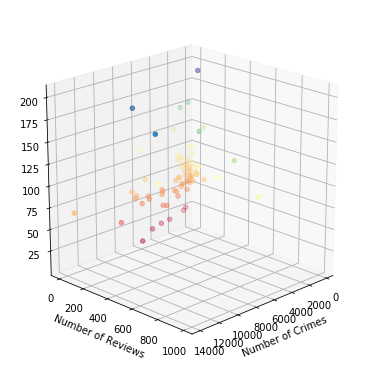

In [42]:
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(x['CrimeType'], x['reviews_per_month'], y, c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.xlabel("Number of Crimes")
plt.ylabel("Number of Reviews")
plt.show()